### Content
**Car insurance** offers protection against accidents, theft, natural calamities & other unforeseen circumstances that could harm your vehicle. Having a good motor insurance policy ensures that you and your car are protected from the financial losses of these unfortunate events.

#### Problem Statement

Imagine you are a data scientist at a bank in your city. Your bank besides usual services also provides car insurance services. The bank has potential customers data and bank employees call them for advertising available car insurance options.

You are provided with general information about clients (age,job,etc.) as well as more specific information about the current insurance sell campaign (communication,last contact day) and previous campaign (attributes like previous attempts,outcome etc).

You have data about 3100 customers who were contacted during the last campaign and for whom the results of the campaign (if the customer bought insurance or not) are known.


#### Objective

You are provided 935 customers data who were contacted during the current campaign. You are required to build a machine learning model to predict if these customers will buy the car insurance or not


#### Evaluation Criteria
Submissions are evaluated using **100 * Accuracy Score**.

#####  About the Data

There are 19 variables (including the target variable) in the train dataset. Below are some of the listed variables and their description:

 

- **age** : age of the customer

- **job_type** : what job does customer do

- **marital_status** : if the customer is married or not

- **education_level** : education level of the customer

- **default_or_not** : if the customer was able to repay in time or not

- **balance_amt** : balance amount of the customer in the bank

- **hoursehold_insurance** : if the customer has bought household insurance or not

- **car_loan** : if the customer has car loan

- **communication** : mode of communication

- **last_contact_day** : when the customer was last contacted (day)

- **last_contact_month** : when the customer was last contacted (month)

- **no_of_contacts** : How many times was the customer contacted in the current campaign

- **days_passed** : days passed since the last contact (-1 means the data is missing)

- **prev_attempts** : how many times was the customer previously contacted (i.e. in the campaigns befor this) 

- **outcome** : what was the outcome of the last contact

- **call_start** : call start time

- **call_end** : call end time

- **car_insurance** : if the customer bought car insurance (the **target variable**, 1 - **Boutght**, 0 - **Not-Bought**)

## Installing required packages

In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


In [ ]:
!pip install xgboost

In [ ]:
!pip install catboost

### Load Required Packages

In [ ]:
import pandas as pd # For data manipulation
import numpy as np # for Linear Algebra & Calculus

# ## For Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading Data

In [ ]:
train = pd.read_csv('Train_data.csv')
test = pd.read_csv('Test_data.csv')

In [ ]:
train.head(10)

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1
5,37.000000,management,married,tertiary,0,3737.000000,0,0,cellular,7,jul,1,-1,0,NaN,10:15:03,10:18:47,1
6,30.000000,blue-collar,married,secondary,0,1.000000,0,1,cellular,9,jul,1,-1,0,NaN,10:51:56,10:57:43,0
7,21.000000,student,single,primary,0,1596.000000,0,0,cellular,26,aug,1,93,2,failure,10:10:32,10:12:27,0
8,52.091704,admin.,married,secondary,0,101.453662,0,0,cellular,21,aug,3,-1,0,NaN,16:42:19,16:52:35,1
9,49.000000,technician,married,secondary,0,412.000000,0,0,cellular,19,aug,8,-1,0,NaN,15:33:44,15:55:17,1


In [ ]:
# print(train.DESCR)

In [ ]:
# Checking Shape of data

print(f'>>> Train dataset consist of {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'>>> Test dataset consist of {test.shape[0]} rows and {test.shape[1]} columns.')


>>> Train dataset consist of 3102 rows and 18 columns.
>>> Test dataset consist of 935 rows and 17 columns.


In [ ]:
# Print a Concise Summary of a DataFrame.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3091 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      2989 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   communication        2559 non-null   object 
 9   last_contact_day     3102 non-null   int64  
 10  last_contact_month   3102 non-null   object 
 11  no_of_contacts       3102 non-null   int64  
 12  days_passed          3102 non-null   int64  
 13  prev_attempts        3102 non-null   int64  
 14  Outcome              751 non-null    object 
 15  call_start           3102 non-null   o

1. DataFrame consists 2 floating point, 8 intgral, and 8 object data types.
2. Their are also some values are missing

In [ ]:
# Checking Descriptive Statistics
train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,3102,NaN,NaN,NaN,41.3258,11.5177,18,32,39,49,92
job_type,3091,11,management,724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,3102,3,married,1864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,2989,3,secondary,1569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default_or_not,3102,NaN,NaN,NaN,0.0145068,0.119587,0,0,0,0,1
balance_amt,3102,NaN,NaN,NaN,1543.07,3301.47,-3058,123.821,589,1696,52587
household_insurance,3102,NaN,NaN,NaN,0.465184,0.498867,0,0,0,1,1
car_loan,3102,NaN,NaN,NaN,0.114442,0.318399,0,0,0,0,1
communication,2559,2,cellular,2397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_contact_day,3102,NaN,NaN,NaN,15.354,8.16426,1,8,15,21,31


1. DataFrame is affected with **Outliers**.
2. The Negative values are missing values.


In [ ]:
# Checking any missing values
train.isnull().sum()

age                       0
job_type                 11
marital_status            0
education_level         113
default_or_not            0
balance_amt               0
household_insurance       0
car_loan                  0
communication           543
last_contact_day          0
last_contact_month        0
no_of_contacts            0
days_passed               0
prev_attempts             0
Outcome                2351
call_start                0
call_end                  0
car_insurance             0
dtype: int64

In [ ]:
# Checking any duplicates
train.duplicated(keep = 'first').sum()

300

In [ ]:
# Checking Count Distinct Observations over requested axis.
train.nunique()

age                     580
job_type                 11
marital_status            3
education_level           3
default_or_not            2
balance_amt            2004
household_insurance       2
car_loan                  2
communication             2
last_contact_day         31
last_contact_month       12
no_of_contacts           29
days_passed             321
prev_attempts            22
Outcome                   3
call_start             2309
call_end               2321
car_insurance             2
dtype: int64

## ## Data Visiualization

In [ ]:
train['car_insurance'].value_counts(normalize = True)*100

1    56.737589
0    43.262411
Name: car_insurance, dtype: float64

Text(0, 0.5, 'percentage (%)')

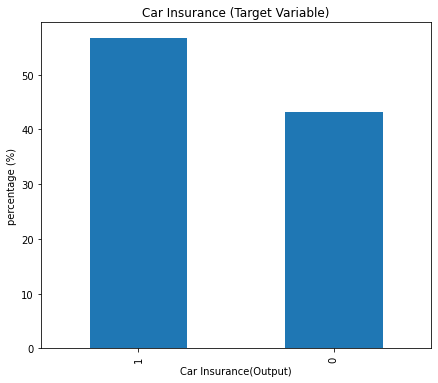

In [ ]:
# ## Target Attribute Vizualization
(train['car_insurance'].value_counts(normalize = True)*100).plot(kind = 'bar', figsize = (7, 6), 
                                                           title = 'Car Insurance (Target Variable)')
plt.xlabel('Car Insurance(Output)')
plt.ylabel('percentage (%)')

1. around 58% people **Brought** the car insurance.
2. while around 42% people **Not-Brought** the car insurance.

Text(0, 0.5, 'Frequency')

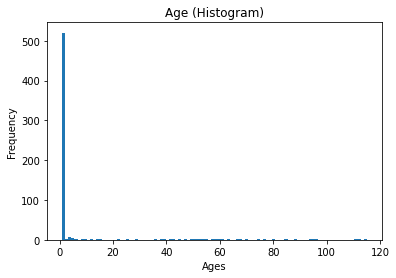

In [ ]:
# ## Histogram of Age Attribute

train['age'].value_counts().plot.hist(bins = 100, figsize = (6, 4), title = 'Age (Histogram)')
plt.xlabel('Ages')
plt.ylabel('Frequency')

- **Insights -**
    - We get **hightest numbers near 0**, and this is **not possible a less than 14 years person can have a car insurance**.
    - age must be **integer type*** not a **float type**, we need to convert that in Data Preprocessing.
    - Data is **not Gaussianly / Normaly Distributed**. 
    - **Age is Normaly Distributed universally**.
    - We can see through above graph data is affected by outliers too.

Text(0, 0.5, 'Percentage (%)')

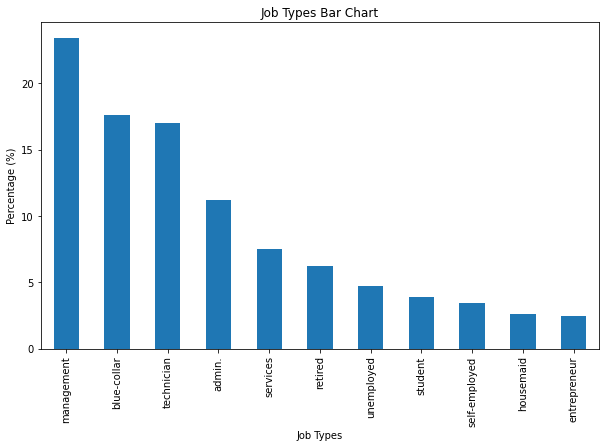

In [ ]:
# ## Bar Chart of Job Types

(train['job_type'].value_counts(normalize = True)*100).plot(kind = 'bar', figsize = (10, 6), title = 'Job Types Bar Chart')
plt.xlabel('Job Types')
plt.ylabel('Percentage (%)')

- **Insights -**
    1. **Management Level** job type covers around **25%** compared to other job types, 
    2. followed by **Blue-Collar**, **Technician** covers around **18%** and **17%** respectively. These **3 job-types** covers around **60%** of all job-types.
    3. While **Entrepreneaur** are **less than 3%** and **Self-Employed** are **less than 4%** respectively.
    4. we can also see the **Unproductive** job-types are **around 15%**, these includes **Retired, Unemployed, & Student** respectively.

Text(0, 0.5, 'Percentage (%)')

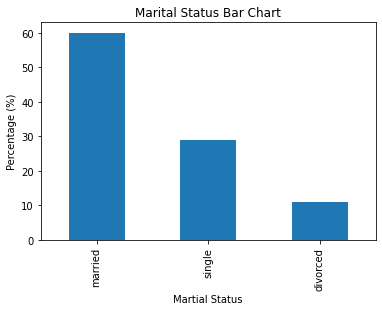

In [ ]:
# ## Marital Status Bar Chart

(train['marital_status'].value_counts(normalize = True, dropna = True)*100).plot.bar(figsize = (6, 4), 
                                                                                     title = 'Marital Status Bar Chart')
plt.xlabel('Martial Status')
plt.ylabel('Percentage (%)')

- **Insights -**
    - **Married** are around 60% covers of Data population.
    - **Single** are covers around 30% of Data Population
    - **Divorced** are covers around 11% of Data population.
    

Text(0, 0.5, 'Percentage (%)')

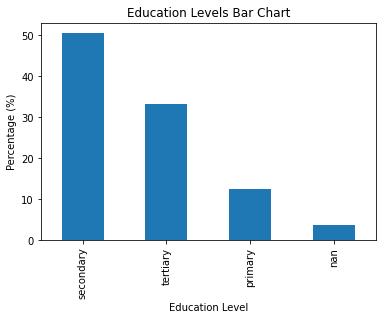

In [ ]:
# ## Education Level Distribution using Bar Chart
(train['education_level'].value_counts(normalize = True, dropna = False)*100).plot(kind = 'bar', figsize = (6, 4),
                                                                                  title = 'Education Levels Bar Chart')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')

- **Insights -**
    1. **Secondary** Education level covers **around 50%** of Data Population.
    2. **Tertiary** Education level means **Graduaction or Under-graduation** covers **less than 35%**.
    3. While **Primary** Education level covers **more than 10%**.
    4. We can also see some **Missing / Nan** values which are **less than 5**

Text(0, 0.5, 'Percentage (%)')

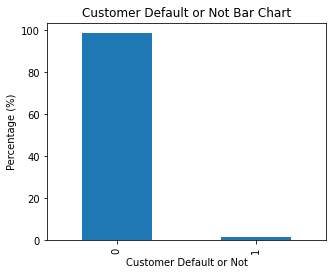

In [ ]:
(train['default_or_not'].value_counts(normalize = True, dropna = False)*100).plot.bar(figsize = (5, 4),
                                                                                title = 'Customer Default or Not Bar Chart')
plt.xlabel('Customer Default or Not')
plt.ylabel('Percentage (%)')

- **Insights -**
    1. Data is **not balancely distributed**.
    2. **around 98%** of population is **Not Default** while **around 2%** of population is **Defaulted**.

Text(0.5, 0, 'Customer Balance Amount in Bank')

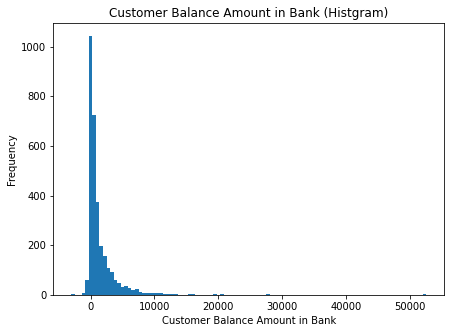

In [ ]:
train['balance_amt'].plot.hist(bins = 100, figsize = (7, 5), title = 'Customer Balance Amount in Bank (Histgram)')
plt.xlabel('Customer Balance Amount in Bank')

- **Insights -**
    1. Their is some **Negative Amount** either it is **Overdraft / Credit Facility** provided by Bank.
    2. At both end we can see some **Outliers** but at **Right side** their are more outliers.
    3. Data is **Right-Skewed Distributed**

Text(0, 0.5, 'Percentage (%)')

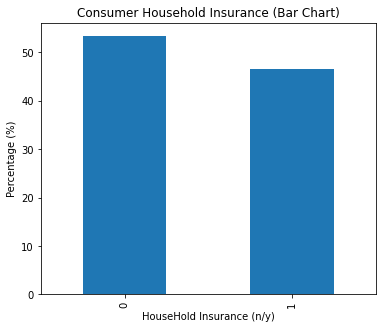

In [ ]:
# ## Consumer Household Insurance Bar Chart

(train['household_insurance'].value_counts(normalize = True, dropna = False)*100).plot.bar(figsize = (6, 5),
                                                                                           title = 'Consumer Household Insurance (Bar Chart)')
plt.xlabel('HouseHold Insurance (n/y)')
plt.ylabel('Percentage (%)')

- **Insights -**
    - Data is **Balancely Distributed**
    - **around 55%** consumers **didn't have Household Insurance**.
    -  while **around 45%** consumers **did have Household Insurance**.

Text(0, 0.5, 'Percentage (%)')

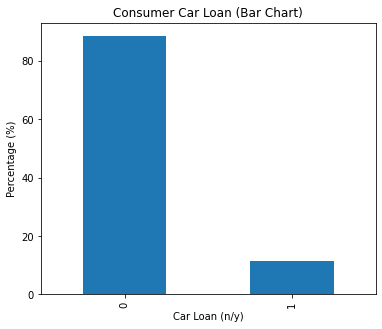

In [ ]:
# ## Consumer Car Loan Bar Chart

(train['car_loan'].value_counts(normalize = True, dropna = False)*100).plot.bar(figsize = (6, 5),
                                                                                title = 'Consumer Car Loan (Bar Chart)')
plt.xlabel('Car Loan (n/y)')
plt.ylabel('Percentage (%)')



- **Insights -**
    - Data is **not balanced**.
    - **around 90%** consumers **doesn't have Car Loans**.
    - while **around 10%** consumers **does have Car Loans**.

Text(0, 0.5, 'Percentage (%)')

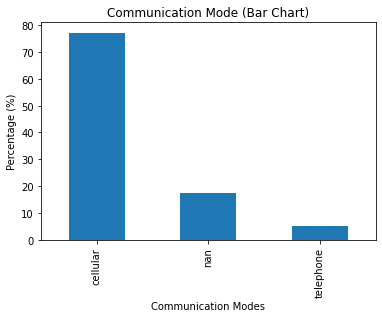

In [ ]:
(train['communication'].value_counts(normalize = True, dropna = False)*100).plot.bar(figsize = (6, 4),
                                                                                    title = 'Communication Mode (Bar Chart)')
plt.xlabel('Communication Modes')
plt.ylabel('Percentage (%)')

- **Insights -**
    - Data is **Not Balancedly Distributed**.
    - **more then 75%** customers were contacted via **Cellular** mode.
    - while **only 5%** customers were contacted via **Telephone** mode.
    - In this attributes we can see **less than 20%** are **Missing / NaN values**.

Text(0, 0.5, 'Frequency')

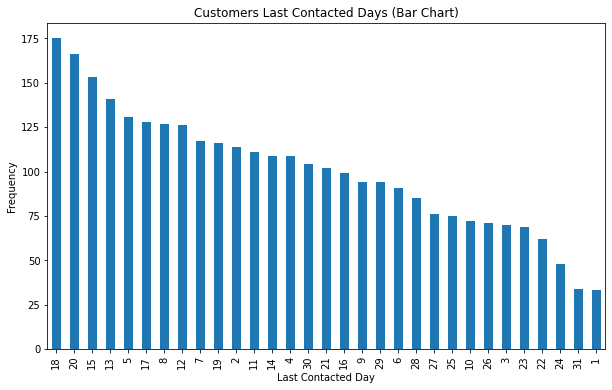

In [ ]:
# ## Customers Last Contacted Days Bar Chart
(train['last_contact_day'].value_counts(dropna = False)).plot.bar(figsize = (10,6),
                                                                  title='Customers Last Contacted Days (Bar Chart)')
plt.xlabel('Last Contacted Day')
plt.ylabel('Frequency')

- **Insights -**
    - **most Customers are contacted on 18th** day, followed by **20th**, **15th**, **13th** and **5th** days. Those are **top 5 days** to contact customers respectively.
    - while **1st** day were **least Customers are contacted**, followed by **31st**, **24th**, **22nd**, and **23rd** days are **bottom 5 days** respectively.

Text(0, 0.5, 'Frequency')

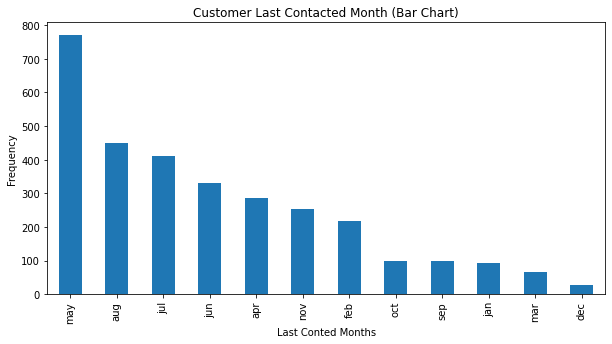

In [ ]:
# ## Customer Last Contacted Months Bar Chart

train['last_contact_month'].value_counts(dropna = False).plot.bar(figsize = (10, 5),
                                                                  title = 'Customer Last Contacted Month (Bar Chart)')
plt.xlabel('Last Conted Months')
plt.ylabel('Frequency')

- **Insights -**
    - In **May Month** hightes customers were contacted.
    - In **December Month** least customers were contacted. 

Text(0, 0.5, 'Frequencies')

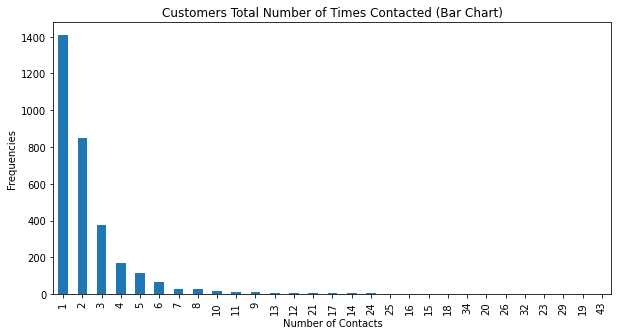

In [ ]:
# ## Number of Contacts
train['no_of_contacts'].value_counts().plot.bar(figsize = (10, 5), 
                                                title = 'Customers Total Number of Times Contacted (Bar Chart)')
plt.xlabel('Number of Contacts')
plt.ylabel('Frequencies')

- **Insights -**
    - Highest Customers were contacted **1st Time** during the current campaign.
    - followed by **2nd**, **3rd**, **4th** and **5th** times are the **Top-5 Times Contacted** customers during the Current Campaign.

Text(0, 0.5, 'Frequencies')

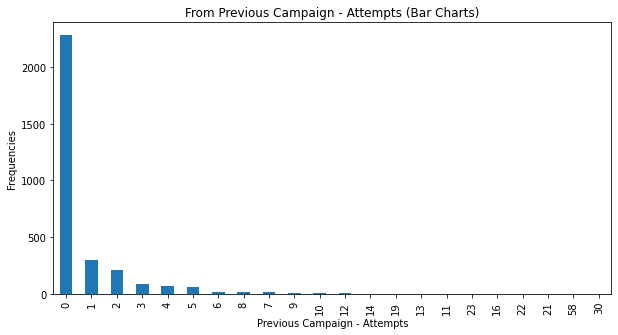

In [ ]:
train['prev_attempts'].value_counts(dropna = False).plot.bar(figsize = (10,5),
                                                            title = 'From Previous Campaign - Attempts (Bar Charts)')
plt.xlabel('Previous Campaign - Attempts')
plt.ylabel('Frequencies')

- **Insights -**
    - **around 2300** customers were **1st time** contacted in Current Campaign.
    - Remaining customers are contacted from **Previous Campaign**.

Text(0, 0.5, 'Percentage (%)')

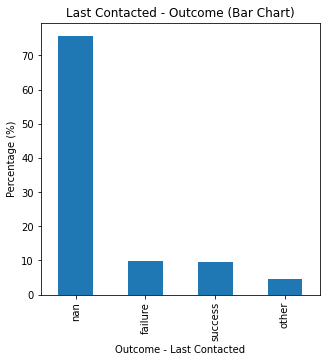

In [ ]:
# ## Last Contacted Outcome Bar Chart
(train['Outcome'].value_counts(normalize = True, dropna = False)*100).plot.bar(figsize = (5, 5),
                                                                         title = 'Last Contacted - Outcome (Bar Chart)')
plt.xlabel('Outcome - Last Contacted')
plt.ylabel('Percentage (%)')

- **Insights -**
    - **around 75%** values are **Missing / NaN Values**.
    - **around 10%** are **Failure** Outcomes means **customers were not interested**.
    - **around 10%** are **Success** Outcomes means **Customers wre interested**
    - **around 5%** are **Confused**, these are **not abled to decide whether interested or not** - **Other** Customers

Text(0, 0.5, 'Frequencies')

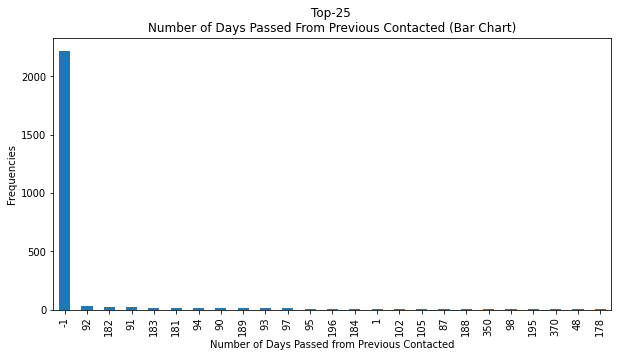

In [ ]:
train['days_passed'].value_counts(dropna = False).head(25).plot.bar(figsize = (10, 5),
                                                                   title = 'Top-25 \nNumber of Days Passed From Previous Contacted (Bar Chart)')
plt.xlabel('Number of Days Passed from Previous Contacted')
plt.ylabel('Frequencies')

- **Insights -**
    - **more than 2200** values are **Missing / NaN Values** (as per Data Information)
    - Missing Values are more than 70%, we will drop this attribute.

### ## Data Visualization - Bivarient Analysis 

In [ ]:
train.nunique()

age                     580
job_type                 11
marital_status            3
education_level           3
default_or_not            2
balance_amt            2004
household_insurance       2
car_loan                  2
communication             2
last_contact_day         31
last_contact_month       12
no_of_contacts           29
days_passed             321
prev_attempts            22
Outcome                   3
call_start             2309
call_end               2321
car_insurance             2
dtype: int64

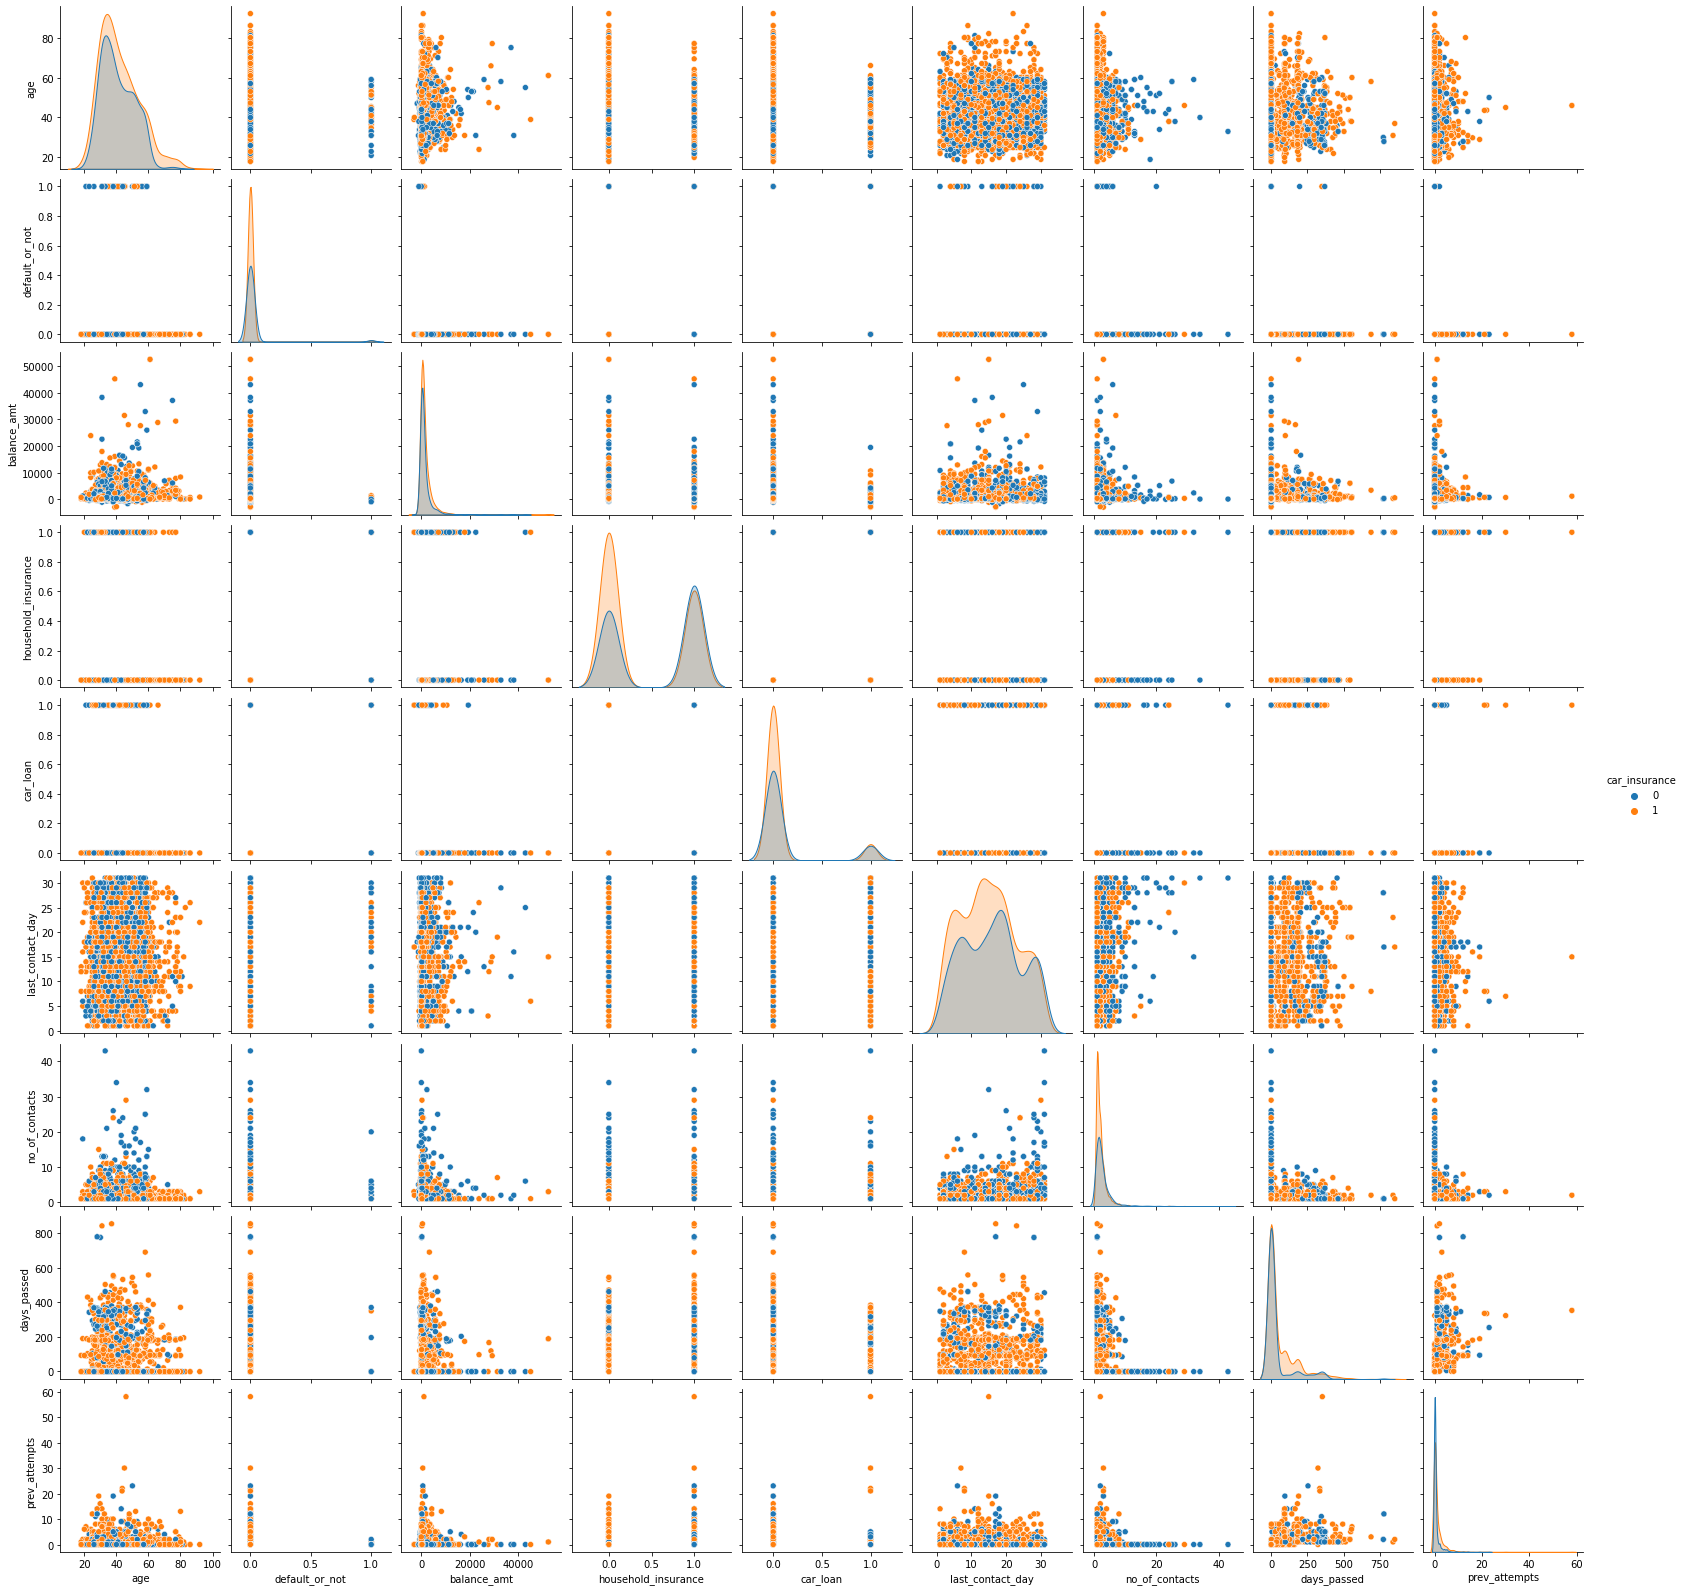

In [ ]:
sns.pairplot(train, hue = 'car_insurance')

- From above Pairplot, we can see data set is affected from **Outliers**.

## ## Data Preprocessing

In [ ]:
data = train.copy()
data_test = test.copy()

In [ ]:
# ## Droping Call_Start and Call_end

data.drop(['days_passed', 'household_insurance', 'Outcome', 'call_start', 'call_end'], axis = 1, inplace = True)
data_test.drop(['days_passed', 'household_insurance', 'Outcome', 'call_start', 'call_end'], axis = 1, inplace = True)

# ## Changing Data type of Age feature
data['age'] = data['age'].astype('int32')
data_test['age'] = data_test['age'].astype('int32')

data

,age,job_type,marital_status,education_level,default_or_not,balance_amt,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,prev_attempts,car_insurance
0,47,blue-collar,married,primary,0,1112.000000,0,cellular,13,may,1,0,0
1,46,management,married,tertiary,0,1.312372,1,cellular,15,may,3,1,1
2,36,services,single,NaN,0,281.000000,0,NaN,16,may,1,0,1
3,32,technician,single,secondary,0,540.000000,1,cellular,29,jan,1,0,1
4,30,admin.,single,secondary,0,315.000000,0,cellular,14,may,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,44,technician,single,NaN,0,78.000000,0,NaN,6,may,6,0,0
3098,57,admin.,married,secondary,0,4168.000000,1,NaN,16,may,1,0,0
3099,51,entrepreneur,married,tertiary,0,83.000000,0,cellular,20,apr,2,0,1
3100,61,blue-collar,married,primary,0,5.000000,0,cellular,6,aug,2,3,1


#### ## Imputing Missing values

In [ ]:
# ## Imputing missing values by mode in Object datatypes and median in non-object datatypes

# ## Displaying Missing Values in respect to Object types with np.nan values Before Imputation
print('>>> Missing Values Before Fillna in Train: ')
print(data[['job_type', 'education_level', 'communication']].isnull().sum())
print('-'* 50)
print()
print('>>> Missing Values Before Fillna in Test : ')
print(data_test[['job_type', 'education_level', 'communication']].isnull().sum())
print('-'* 50)
print()

# ## Creating Categorical variables for Object types which has missing values

cat_cols = ['job_type', 'education_level', 'communication']

# ## Running a Loop to impute missing value with Mode() in respective columns in Train & Test datasets

for i in cat_cols:
    data[i].fillna(data[i].mode()[0], inplace = True)
    data_test[i].fillna(data_test[i].mode()[0], inplace = True)

# ## Displaying Missing Values in respect to Object types with np.nan values After Imputation

print('>>> Missing Values After Fillna in Train : ')
print(data[['job_type', 'education_level', 'communication']].isnull().sum())
print('-'* 50)
print()
print('>>> Missing Values After Fillna in Test : ')
print(data_test[['job_type', 'education_level', 'communication']].isnull().sum())
print('-'* 50)

>>> Missing Values Before Fillna in Train: 
job_type            11
education_level    113
communication      543
dtype: int64
--------------------------------------------------

>>> Missing Values Before Fillna in Test : 
job_type             5
education_level     34
communication      165
dtype: int64
--------------------------------------------------

>>> Missing Values After Fillna in Train : 
job_type           0
education_level    0
communication      0
dtype: int64
--------------------------------------------------

>>> Missing Values After Fillna in Test : 
job_type           0
education_level    0
communication      0
dtype: int64
--------------------------------------------------


In [ ]:
print(f'>>> If any missing values remain or not in train data : {np.nan in data}.')
print(f'>>> If any missing values remain or not in test data : {np.nan in data_test}.')

>>> If any missing values remain or not in train data : False.
>>> If any missing values remain or not in test data : False.


In [ ]:
# ## Replacing -1(which is Missing value) with 0.0 in both Train (data) & Test (data_test) sets -

# data.loc[data['days_passed'] == -1, 'days_passed'] = 0.0
# data_test.loc[data_test['days_passed'] == -1, 'days_passed'] = 0.0

# data['days_passed'].value_counts(normalize = True, dropna = False)
# data_test['days_passed'].value_counts(normalize = True, dropna = False)



In [ ]:
# ## Dropping duplicate columns

# ## Displaying Duplicates before drop
print('>>> Duplicates in Data Before drop : ', data.duplicated(keep = 'first').sum())

# Dropping duplicates 
data.drop_duplicates(keep = 'first', inplace = True)

# ## Displaying Duplicates Dropped or not
print('>>> Duplicates in Data After drop : ', data.duplicated(keep = 'first').sum())


>>> Duplicates in Data Before drop :  300
>>> Duplicates in Data After drop :  0


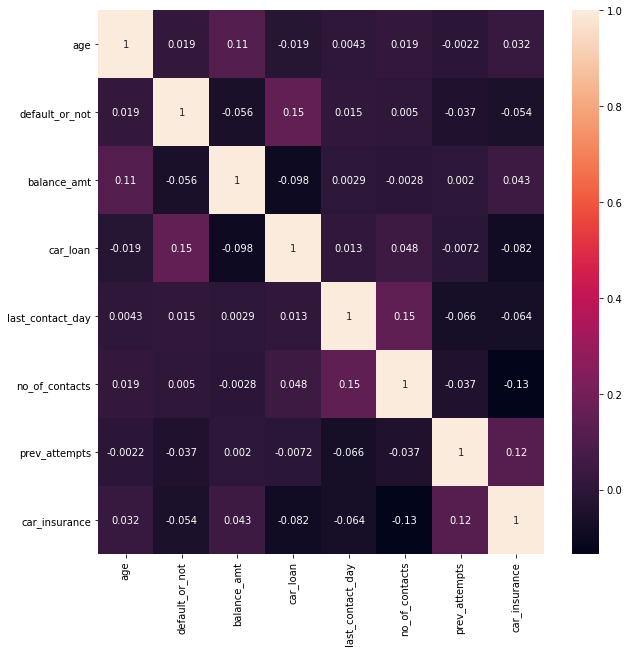

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True)

### ## Data Preprocessing

In [ ]:
# ## Spliting data into variables (X) and target (y)

X = data.drop('car_insurance', axis = 1)
y = data['car_insurance']

# ## Displaying shape of X, y

print(f'>>> X set Shape : {X.shape}')
print(f'>>> y set Shape : {y.shape}')


>>> X set Shape : (2802, 12)
>>> y set Shape : (2802,)


In [ ]:
X

,age,job_type,marital_status,education_level,default_or_not,balance_amt,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,prev_attempts
0,47,blue-collar,married,primary,0,1112.000000,0,cellular,13,may,1,0
1,46,management,married,tertiary,0,1.312372,1,cellular,15,may,3,1
2,36,services,single,secondary,0,281.000000,0,cellular,16,may,1,0
3,32,technician,single,secondary,0,540.000000,1,cellular,29,jan,1,0
4,30,admin.,single,secondary,0,315.000000,0,cellular,14,may,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2797,41,management,married,secondary,0,2753.566864,0,cellular,19,apr,1,0
2798,30,blue-collar,single,secondary,0,315.000000,0,cellular,23,jun,1,0
2799,32,blue-collar,married,primary,0,3136.000000,0,cellular,19,nov,1,0
2800,31,blue-collar,married,secondary,0,0.000000,0,telephone,23,jul,1,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2802 entries, 0 to 2801
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 2802 non-null   int32  
 1   job_type            2802 non-null   object 
 2   marital_status      2802 non-null   object 
 3   education_level     2802 non-null   object 
 4   default_or_not      2802 non-null   int64  
 5   balance_amt         2802 non-null   float64
 6   car_loan            2802 non-null   int64  
 7   communication       2802 non-null   object 
 8   last_contact_day    2802 non-null   int64  
 9   last_contact_month  2802 non-null   object 
 10  no_of_contacts      2802 non-null   int64  
 11  prev_attempts       2802 non-null   int64  
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 273.6+ KB


In [ ]:
data_test

,age,job_type,marital_status,education_level,default_or_not,balance_amt,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,prev_attempts
0,65,retired,married,secondary,0,20806.0,0,telephone,8,apr,2,0
1,36,management,married,tertiary,0,900.0,0,cellular,15,may,2,0
2,37,management,married,tertiary,0,6771.0,0,cellular,7,sep,1,1
3,30,management,single,tertiary,0,0.0,0,cellular,14,may,2,0
4,41,management,married,tertiary,0,328.0,0,cellular,29,jul,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
930,31,blue-collar,married,secondary,0,152.0,1,cellular,8,jul,1,0
931,30,technician,single,secondary,0,53.0,0,cellular,18,jul,5,0
932,42,management,married,tertiary,0,36.0,0,cellular,21,nov,3,0
933,46,services,married,secondary,0,2948.0,0,cellular,21,nov,1,0


In [ ]:
# ## Applying Label Encoder on Categorical Features

cat_cols = ['job_type', 'marital_status', 'education_level', 'communication', 'last_contact_month']

X_enc = pd.get_dummies(X, columns = cat_cols , drop_first = True)
test_dummy = pd.get_dummies(data_test, columns = cat_cols, drop_first = True)

# ## X head
X_enc

,age,default_or_not,balance_amt,car_loan,last_contact_day,no_of_contacts,prev_attempts,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,marital_status_married,marital_status_single,education_level_secondary,education_level_tertiary,communication_telephone,last_contact_month_aug,last_contact_month_dec,last_contact_month_feb,last_contact_month_jan,last_contact_month_jul,last_contact_month_jun,last_contact_month_mar,last_contact_month_may,last_contact_month_nov,last_contact_month_oct,last_contact_month_sep
0,47,0,1112.000000,0,13,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,46,0,1.312372,1,15,3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,36,0,281.000000,0,16,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,32,0,540.000000,1,29,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,30,0,315.000000,0,14,3,4,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,41,0,2753.566864,0,19,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2798,30,0,315.000000,0,23,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2799,32,0,3136.000000,0,19,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2800,31,0,0.000000,0,23,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
data['job_type'].value_counts()

management       663
blue-collar      496
technician       465
admin.           311
services         219
retired          179
unemployed       135
student          108
self-employed     89
housemaid         71
entrepreneur      66
Name: job_type, dtype: int64

In [ ]:
# from sklearn.preprocessing import StandardScaler

# float_cols = [['age','balance_amt']]
# for i in float_cols:
#     sc = StandardScaler()
#     X_enc[i] = sc.fit_transform(X_enc[i].values)

# # X_enc[['age','balance_amt']] = X_enc[['age','balance_amt']].apply(lambda x: StandardScaler().fit_transform(x))

# X_enc

In [ ]:
data

,age,job_type,marital_status,education_level,default_or_not,balance_amt,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,prev_attempts,car_insurance
0,47,blue-collar,married,primary,0,1112.000000,0,cellular,13,may,1,0,0
1,46,management,married,tertiary,0,1.312372,1,cellular,15,may,3,1,1
2,36,services,single,secondary,0,281.000000,0,cellular,16,may,1,0,1
3,32,technician,single,secondary,0,540.000000,1,cellular,29,jan,1,0,1
4,30,admin.,single,secondary,0,315.000000,0,cellular,14,may,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,41,management,married,secondary,0,2753.566864,0,cellular,19,apr,1,0,1
2798,30,blue-collar,single,secondary,0,315.000000,0,cellular,23,jun,1,0,1
2799,32,blue-collar,married,primary,0,3136.000000,0,cellular,19,nov,1,0,1
2800,31,blue-collar,married,secondary,0,0.000000,0,telephone,23,jul,1,0,0


## ## Base Model Building

In [ ]:
# ## Splitting data (Train) into train_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size = 0.30, random_state = 0)

# ## Displaying X_train, X_test, y_train, y_test shape
print(f'>>> X_train shape : {X_train.shape} and X_test shape : {X_test.shape}.')
print(f'>>> y_train shape : {y_train.shape} and y_test shape : {y_test.shape}.')

>>> X_train shape : (1961, 33) and X_test shape : (841, 33).
>>> y_train shape : (1961,) and y_test shape : (841,).


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score

In [ ]:
# ## LOGISTIC REGRESSION

log_reg = LogisticRegression(penalty = 'l2' ,max_iter = 375, random_state = 53) 
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

acu_score_logReg = np.around(accuracy_score(y_test, log_reg_pred)*100, 2)
acu_score_logReg

65.04

In [ ]:
# ## DECISION TREE CLASSIFIER

dec_tree = DecisionTreeClassifier(criterion='gini', random_state = 53)
dec_tree.fit(X_train, y_train)

dec_tree_pred = dec_tree.predict(X_test)

acu_score_dTree = np.around(accuracy_score(y_test, dec_tree_pred)*100, 2)
acu_score_dTree

61.12

In [ ]:
# ## RANDOM FOREST CLASSIFIER

ran_forest = RandomForestClassifier(n_estimators = 375, criterion = 'entropy', random_state = 53)
ran_forest.fit(X_train, y_train)

ran_forest_pred = ran_forest.predict(X_test)

acu_score_ranForest = np.around(accuracy_score(y_test, ran_forest_pred)*100, 2)
acu_score_ranForest

69.8

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

xtra_tree = ExtraTreesClassifier(n_estimators = 375, criterion = 'entropy', random_state = 73)
xtra_tree.fit(X_train, y_train)

xtra_pred = xtra_tree.predict(X_test)

acu_score_xtraTree = np.around(accuracy_score(y_test, ran_forest_pred)*100, 2)
acu_score_xtraTree

69.8

In [ ]:
# ## ADABOOST CLASSIFIER

ada_boost = AdaBoostClassifier(base_estimator = RandomForestClassifier(criterion = 'entropy'), n_estimators = 375, learning_rate = 0.2, random_state = 73)
ada_boost.fit(X_train, y_train)

ada_boost_pred = ada_boost.predict(X_test)

acu_score_adaBoost = np.around(accuracy_score(y_test, ada_boost_pred)*100, 2)
acu_score_adaBoost

70.04

In [ ]:
# ## GRADIENT BOOSTING CLASSIFIER

grad_boost = GradientBoostingClassifier(loss = 'exponential', learning_rate = 0.2, n_estimators = 375, random_state = 73)
grad_boost.fit(X_train, y_train)

grad_pred = grad_boost.predict(X_test)

acu_score_gradBoost = np.around(accuracy_score(y_test, grad_pred)*100, 2)
acu_score_gradBoost

69.44

In [ ]:
# ## XGBOOST CLASSIFIER

xg_boost = XGBClassifier(max_depth = 5, learning_rate = 0.2, n_estimators = 375, booster = 'gbtree', random_state = 73) #booster = 'gbtree'
xg_boost.fit(X_train, y_train)

xgb_pred = xg_boost.predict(X_test)

acu_score_xgBoost = np.around(accuracy_score(y_test, xgb_pred)*100, 2)
acu_score_xgBoost

68.25

- **Insights -**
  - From above all machine learning algorithms, the AdaBoost Classifier algorithm provides around 70% accuracy

In [ ]:
test_ada_boost_pred = ada_boost.predict(test_dummy)
test_ada_boost_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,

In [ ]:
prediction = pd.DataFrame(test_ada_boost_pred)
prediction

,0
0,1
1,1
2,1
3,1
4,0
...,...
930,0
931,0
932,0
933,0


In [146]:
Pred_data = pd.DataFrame({"prediction" : test_ada_boost_pred} )
Pred_data

#Pred_data.to_csv("Prediction")
Pred_data.to_csv('predict.csv', index = False)